In [11]:
import sys
sys.path.append('/Users/jp/Desktop/Investment/trading_BOT/macd_long_backtester_1stpkbm/')
from macd_long_backtester_1stpkbm import Macd_long_backtester_1stpkbm
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
pd.set_option('display.max_rows', None)

### 1) Launch optimization

In [13]:
macd_peak_opt_a = Macd_long_backtester_1stpkbm('BTCUSDT')

class version 1.0 is being used


In [14]:
df = pd.read_csv('downtrend_peak_a.csv')

In [15]:
macd_peak_opt_a.opt_results = df

In [16]:
#macd_peak_opt_a.execute_opt(interval_opt=('15m', '30m', '1h') ,start_opt='2018-01-07-00:00', end_opt='2018-02-05-00:00', ema_fast_opt=(2,16,2), ema_slow_opt=(16,40,2), ema_sign_opt=(2, 40, 2), int_for_max='1h', trend_ref='A', type_trend='downtrend_peak_a')

### 2) Extract combinations of max

In [18]:
macd_peak_opt_a.opt_results[macd_peak_opt_a.opt_results.multiple_macd_peak_strategy == macd_peak_opt_a.opt_results.multiple_macd_peak_strategy.max()]

,interval_opt,macd_slow_opt,macd_fast_opt,macd_signal_opt,multiple_hold,ann_log_mean_hold,ann_log_std_hold,sharpe_ratio_hold,multiple_macd_peak_strategy,ann_log_mean_macd_peak,ann_log_std_macd_peak,sharpe_ratio_macd_peak,multiple_macd_peak_strategy_net,ann_log_mean_macd_peak_net,ann_log_std_macd_peak_net,sharpe_ratio_macd_peak_net,trend_ref,start_opt,end_opt
1464,15m,38,2,4,0.512629,-0.088753,0.204537,-0.433923,1.629106,0.064846,0.158022,0.410358,1.317136,0.036601,0.158425,0.231031,A,2018-01-07-00:00,2018-02-05-00:00
1482,15m,38,4,2,0.512629,-0.088753,0.204537,-0.433923,1.629106,0.064846,0.158022,0.410358,1.317136,0.036601,0.158425,0.231031,A,2018-01-07-00:00,2018-02-05-00:00


### 3) Create new class for interval of max and launch backtest for the combinations of max

In [21]:
macd_peak_opt_a_15m = Macd_long_backtester_1stpkbm('BTCUSDT')

class version 1.0 is being used


In [23]:
macd_peak_opt_a_15m.prepare_data(start='2018-01-07-00:00', end='2018-02-05-00:00', interval='15m')

2785


In [25]:
macd_peak_opt_a_15m.execute_backtest(start='2018-01-07-00:00', ema_slow=38, ema_fast=2, ema_signal=4)

2829
   multiple_hold  ann_log_mean_hold  ann_log_std_hold  sharpe_ratio_hold  \
0       0.512629          -0.088753          0.204537          -0.433923   

   multiple_macd_peak_strategy  ann_log_mean_macd_peak  ann_log_std_macd_peak  \
0                     1.629106                0.064846               0.158022   

   sharpe_ratio_macd_peak  multiple_macd_peak_strategy_net  \
0                0.410358                         1.317136   

   ann_log_mean_macd_peak_net  ann_log_std_macd_peak_net  \
0                    0.036601                   0.158425   

   sharpe_ratio_macd_peak_net  
0                    0.231031  


(0.5126287594686112,
 -0.08875335770051367,
 0.20453708666144463,
 -0.43392305595620734,
 1.6291060332409641,
 0.06484582007772746,
 0.15802239060678788,
 0.4103584297688887,
 1.3171361821829985,
 0.036600959072203634,
 0.15842474352198618,
 0.2310305717308872)

### 4) Plot the accumulated max vs hold

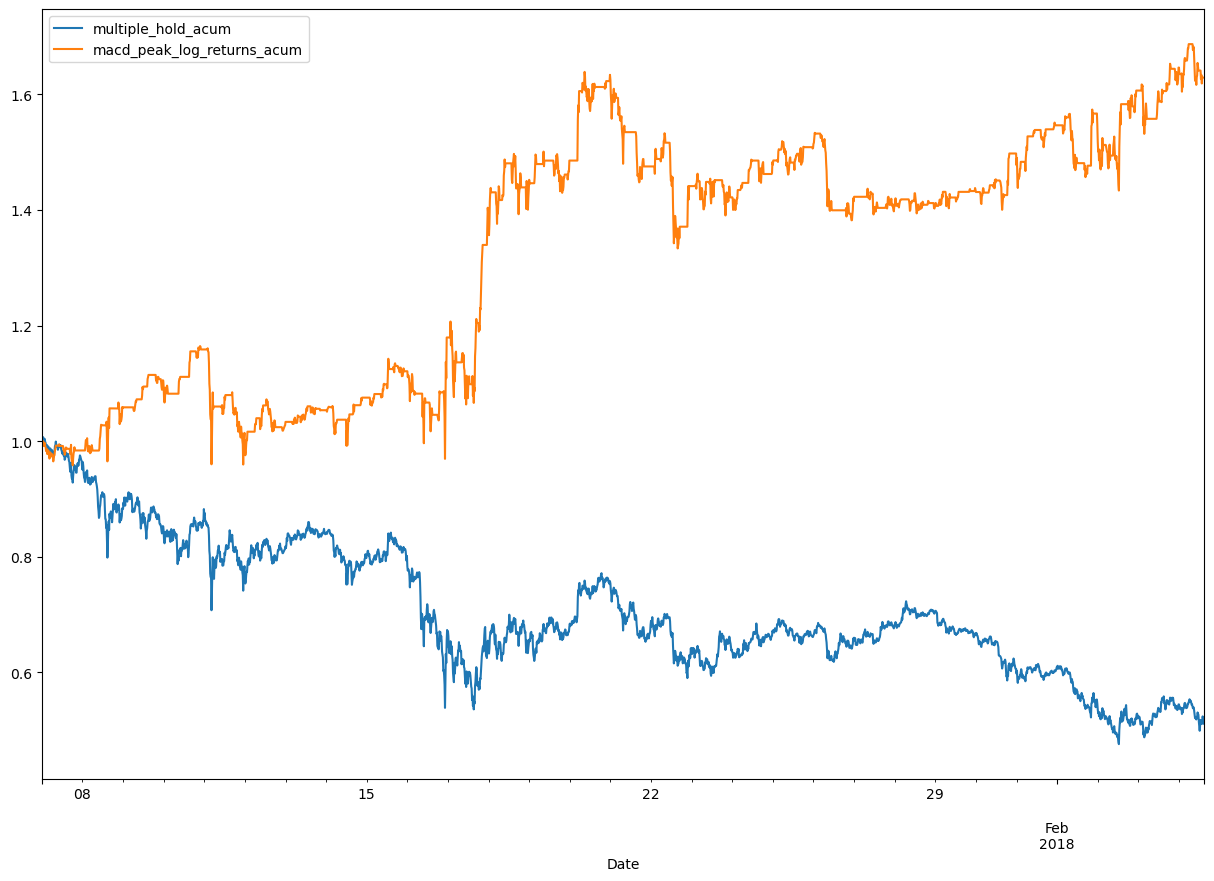

In [27]:
macd_peak_opt_a_15m.data_init.multiple_hold_acum.plot(figsize=(15,10))
macd_peak_opt_a_15m.data_init.macd_peak_log_returns_acum.plot(figsize=(15,10))
plt.legend()

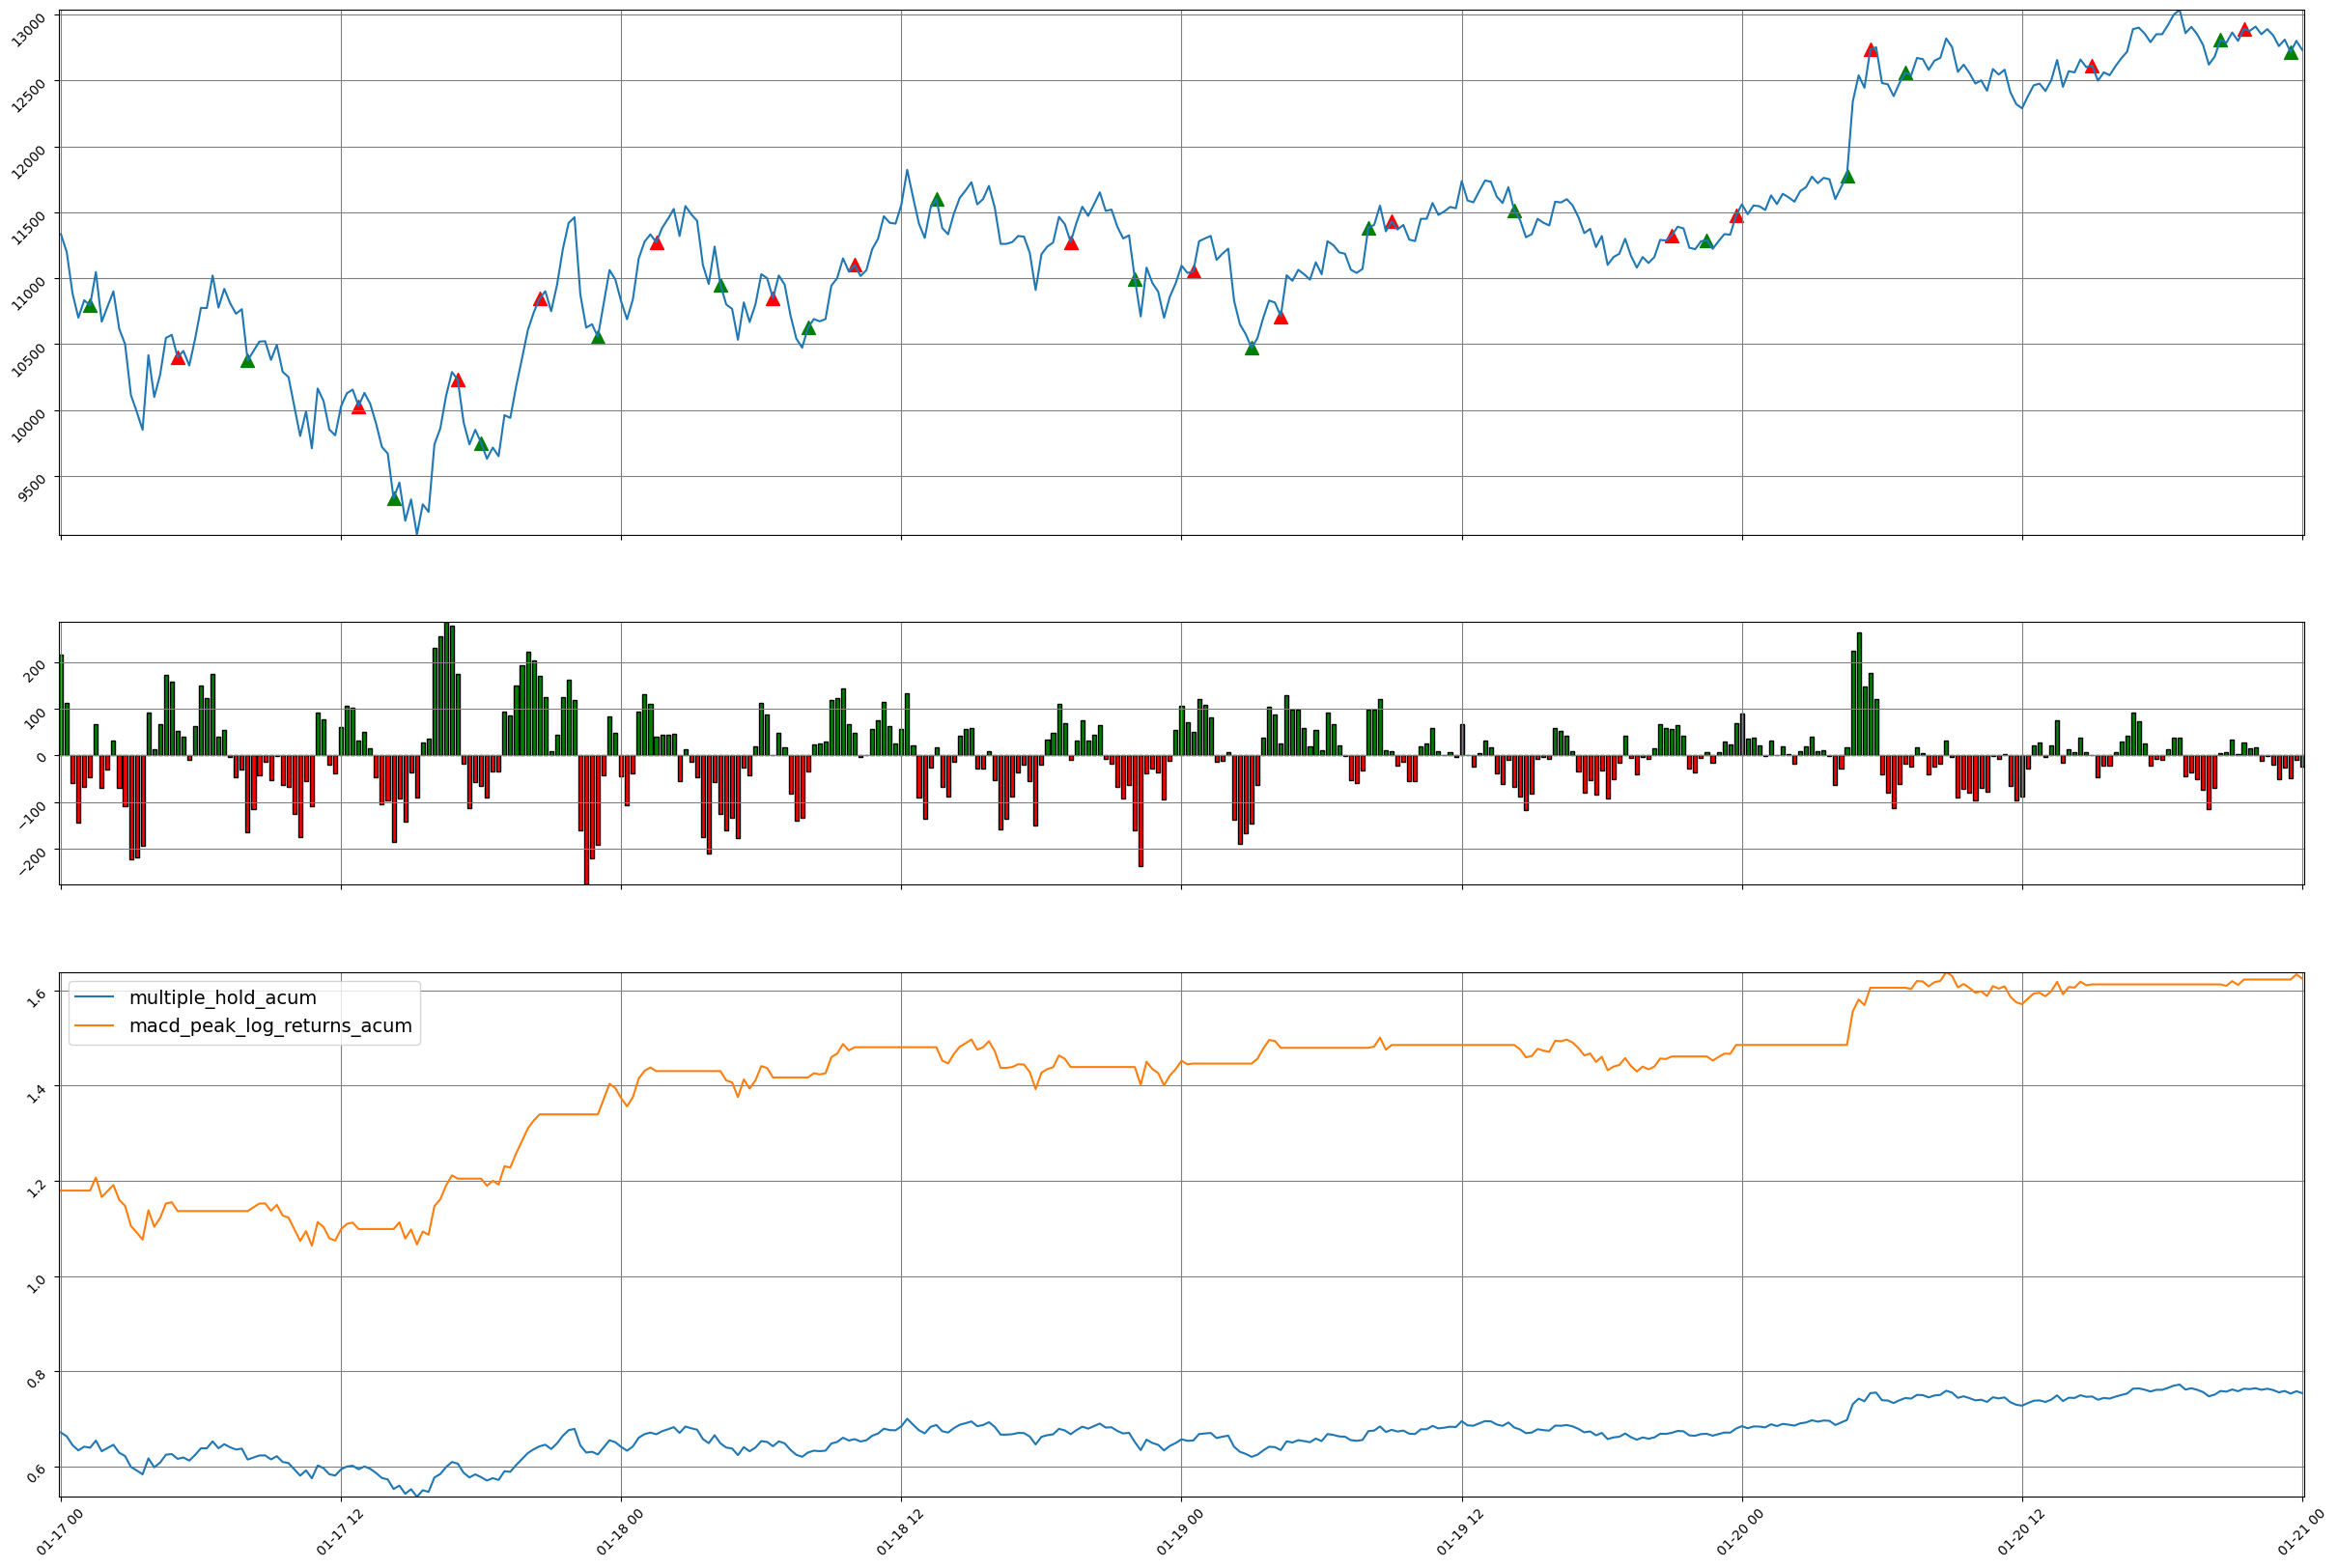

In [36]:
macd_peak_opt_a_15m.plot_backtest_results(start_plot='2018-01-17-00:00', end_plot='2018-01-21-00:00', width_bars=0.007)